In [36]:
import tensorflow as tf
import numpy as np

In [2]:
# where
a = tf.random.normal([3, 3]) # 正态分布

In [3]:
a

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-1.6253889 ,  1.4843055 , -0.5059514 ],
       [-0.7895007 ,  0.6520624 ,  0.27444583],
       [-0.701279  , -2.2493167 ,  1.262599  ]], dtype=float32)>

In [4]:
mask = a > 0

In [5]:
mask

<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
array([[False,  True, False],
       [False,  True,  True],
       [False, False,  True]])>

In [6]:
# 在a里面取到对应mask为True的值
tf.boolean_mask(a, mask)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1.4843055 , 0.6520624 , 0.27444583, 1.262599  ], dtype=float32)>

In [7]:
# 返回mask中为True的部分的坐标
indices = tf.where(mask)

In [8]:
indices

<tf.Tensor: shape=(4, 2), dtype=int64, numpy=
array([[0, 1],
       [1, 1],
       [1, 2],
       [2, 2]])>

In [9]:
# 通过索引(坐标)获取对应位置的值
tf.gather_nd(a, indices)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1.4843055 , 0.6520624 , 0.27444583, 1.262599  ], dtype=float32)>

In [10]:
mask

<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
array([[False,  True, False],
       [False,  True,  True],
       [False, False,  True]])>

In [11]:
A = tf.ones([3, 3])

In [12]:
B = tf.zeros([3, 3])

In [13]:
# mask为True的位置取A中坐标对应的值,mask为False的位置取B中坐标对应的值
tf.where(mask, A, B)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 1., 1.],
       [0., 0., 1.]], dtype=float32)>

In [26]:
# scatter_nd
indices = tf.constant([[4], [3], [1], [7]])

In [15]:
updates = tf.constant([9, 10, 11, 12])

In [16]:
shape = tf.constant([8])

In [28]:
# [0,0,0,0,0,0,0,0] 索引为4的位置更新为9,索引为3的位置更新为10....
# => [ 0, 11,  0, 10,  9,  0,  0, 12]
# 第三个参数代表地板的形状
# a[4],a[3],a[1],a[7]
tf.scatter_nd(indices, updates, [8])

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([ 0, 11,  0, 10,  9,  0,  0, 12], dtype=int32)>

In [29]:
shape

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([8], dtype=int32)>

In [30]:
indices = tf.constant([[0], [2]])

In [31]:
updates = tf.constant([ [[5,5,5,5],[6,6,6,6],[7,7,7,7],[8,8,8,8]],
                        [[5,5,5,5],[6,6,6,6],[7,7,7,7],[8,8,8,8]] ])

In [32]:
updates.shape

TensorShape([2, 4, 4])

In [33]:
# 存储地板的形状
shape = tf.constant([4,4,4])

In [34]:
# 对a[0], a[2]对应的位置进行更新
# a[0].shape == [4,4]
tf.scatter_nd(indices, updates, shape)

<tf.Tensor: shape=(4, 4, 4), dtype=int32, numpy=
array([[[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=int32)>

In [35]:
points = []

In [40]:
np.linspace(-2,2,5)

array([-2., -1.,  0.,  1.,  2.])

In [42]:
for y in np.linspace(-2,2,5):
    for x in np.linspace(-2,2,5):
        points.append([x,y])

In [43]:
points

[[-2.0, -2.0],
 [-1.0, -2.0],
 [0.0, -2.0],
 [1.0, -2.0],
 [2.0, -2.0],
 [-2.0, -1.0],
 [-1.0, -1.0],
 [0.0, -1.0],
 [1.0, -1.0],
 [2.0, -1.0],
 [-2.0, 0.0],
 [-1.0, 0.0],
 [0.0, 0.0],
 [1.0, 0.0],
 [2.0, 0.0],
 [-2.0, 1.0],
 [-1.0, 1.0],
 [0.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [-2.0, 2.0],
 [-1.0, 2.0],
 [0.0, 2.0],
 [1.0, 2.0],
 [2.0, 2.0]]

In [44]:
y = tf.linspace(-2., 2, 5)

In [45]:
y

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([-2., -1.,  0.,  1.,  2.], dtype=float32)>

In [46]:
x = tf.linspace(-2., 2, 5)

In [47]:
# 将x的每一个元素和y的每一个元素按序组合,
# 然后将组合后每一个元素的第一列数据放在一个tensor中,将第二列数据放在一起,
# points_x和points_y中对应位置的组合即之前的组合
points_x,points_y = tf.meshgrid(x, y)

In [48]:
points_x.shape

TensorShape([5, 5])

In [49]:
points_x

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.]], dtype=float32)>

In [50]:
points_y

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-2., -2., -2., -2., -2.],
       [-1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.]], dtype=float32)>

In [51]:
# [-2,-2],[-1,-2],[0,-1]...

In [52]:
# stack([x,y]) x和y对应位置组合
points = tf.stack([points_x,points_y],axis=2)

In [53]:
points

<tf.Tensor: shape=(5, 5, 2), dtype=float32, numpy=
array([[[-2., -2.],
        [-1., -2.],
        [ 0., -2.],
        [ 1., -2.],
        [ 2., -2.]],

       [[-2., -1.],
        [-1., -1.],
        [ 0., -1.],
        [ 1., -1.],
        [ 2., -1.]],

       [[-2.,  0.],
        [-1.,  0.],
        [ 0.,  0.],
        [ 1.,  0.],
        [ 2.,  0.]],

       [[-2.,  1.],
        [-1.,  1.],
        [ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.]],

       [[-2.,  2.],
        [-1.,  2.],
        [ 0.,  2.],
        [ 1.,  2.],
        [ 2.,  2.]]], dtype=float32)>

# z = sin(x) + sin(y)

In [54]:
import matplotlib.pyplot as plt

In [63]:
x = tf.random.normal([4,4,3])

In [64]:
x

<tf.Tensor: shape=(4, 4, 3), dtype=float32, numpy=
array([[[ 0.8605702 , -1.6922299 , -0.8298989 ],
        [ 0.4777882 ,  3.3465009 , -1.7873149 ],
        [ 0.8249779 ,  1.9828622 , -0.13135037],
        [-1.3050379 ,  1.9621488 , -1.543334  ]],

       [[ 0.28095788, -1.2211307 , -1.0443623 ],
        [-1.4363613 , -1.538379  , -1.0386435 ],
        [-0.44024432, -2.709298  ,  0.3436399 ],
        [ 0.75569296,  0.45259908, -0.9904482 ]],

       [[ 0.7710029 ,  1.8396314 ,  0.38009962],
        [-1.4551747 ,  0.0816291 , -1.0898384 ],
        [ 0.5445818 ,  0.142138  , -0.02371774],
        [ 0.6020712 ,  0.55913275,  0.98307174]],

       [[-1.6945864 , -0.548665  , -0.6138034 ],
        [-0.4251204 ,  1.5293301 , -0.6019954 ],
        [-0.80505985, -0.21433775, -0.00808296],
        [-0.529548  , -0.04289442,  1.4651988 ]]], dtype=float32)>

In [65]:
# 相当于取最后一个维度中,索引为0的值
# 此处相当于取第一列
x[...,0]

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[ 0.8605702 ,  0.4777882 ,  0.8249779 , -1.3050379 ],
       [ 0.28095788, -1.4363613 , -0.44024432,  0.75569296],
       [ 0.7710029 , -1.4551747 ,  0.5445818 ,  0.6020712 ],
       [-1.6945864 , -0.4251204 , -0.80505985, -0.529548  ]],
      dtype=float32)>

In [66]:
def func(x):
    
    # z = sin(x) + sin(y) 
    z = tf.math.sin(x[...,0]) + tf.math.sin(x[...,1])
    
    return z

In [67]:
x = tf.linspace(0., 2*3.14, 500)
y = tf.linspace(0., 2*3.14, 500)

In [68]:
# [500, 500]
points_x, points_y = tf.meshgrid(x, y)

In [72]:
# [500, 500, 2]
points = tf.stack([points_x, points_y], axis=2)

In [73]:
z = func(points)

In [74]:
z.shape

TensorShape([500, 500])

In [86]:
tf.reduce_max(z),z

(<tf.Tensor: shape=(), dtype=float32, numpy=1.9999945>,
 <tf.Tensor: shape=(500, 500), dtype=float32, numpy=
 array([[ 0.        ,  0.01258484,  0.02516768, ..., -0.02835162,
         -0.01576961, -0.00318509],
        [ 0.01258484,  0.02516968,  0.03775252, ..., -0.01576678,
         -0.00318477,  0.00939975],
        [ 0.02516768,  0.03775252,  0.05033537, ..., -0.00318394,
          0.00939808,  0.02198259],
        ...,
        [-0.02835162, -0.01576678, -0.00318394, ..., -0.05670325,
         -0.04412123, -0.03153672],
        [-0.01576961, -0.00318477,  0.00939808, ..., -0.04412123,
         -0.03153921, -0.0189547 ],
        [-0.00318509,  0.00939975,  0.02198259, ..., -0.03153672,
         -0.0189547 , -0.00637018]], dtype=float32)>)

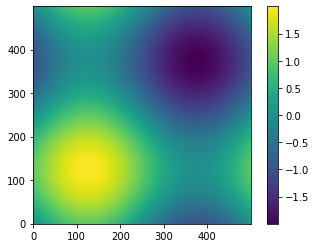

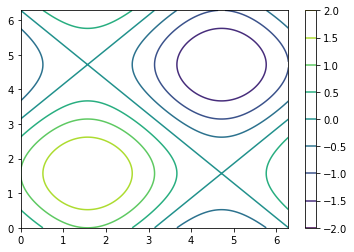

In [83]:
plt.figure("plot 2d func value")
# interpolation 设置了边界的模糊度，或者是图片的模糊度
# 参数：origin : {‘upper’, ‘lower’}
# 将数组的[0,0]索引放在轴的左上角或左下角。
# ‘upper’通常用于矩阵和图像。
# 请注意，垂直轴向上指向“下”但向下指向“上”
plt.imshow(z, origin='lower', interpolation='none')
# 当我们给图配渐变色时，常常需要在图旁边把colorbar显示出来，这里记一下当有多个子图时如何显示colorbar
plt.colorbar()

plt.figure('plot 2d func contour')
# 这个函数主要对网格中每个点的值等于一系列值的时候做出一条条轮廓线，类似于等高线 。
# (x,y,z) [x,y]为显示的坐标
plt.contour(points_x, points_y, z)
plt.colorbar()
plt.show()